# USA HOUSE PRICE PREDICTION

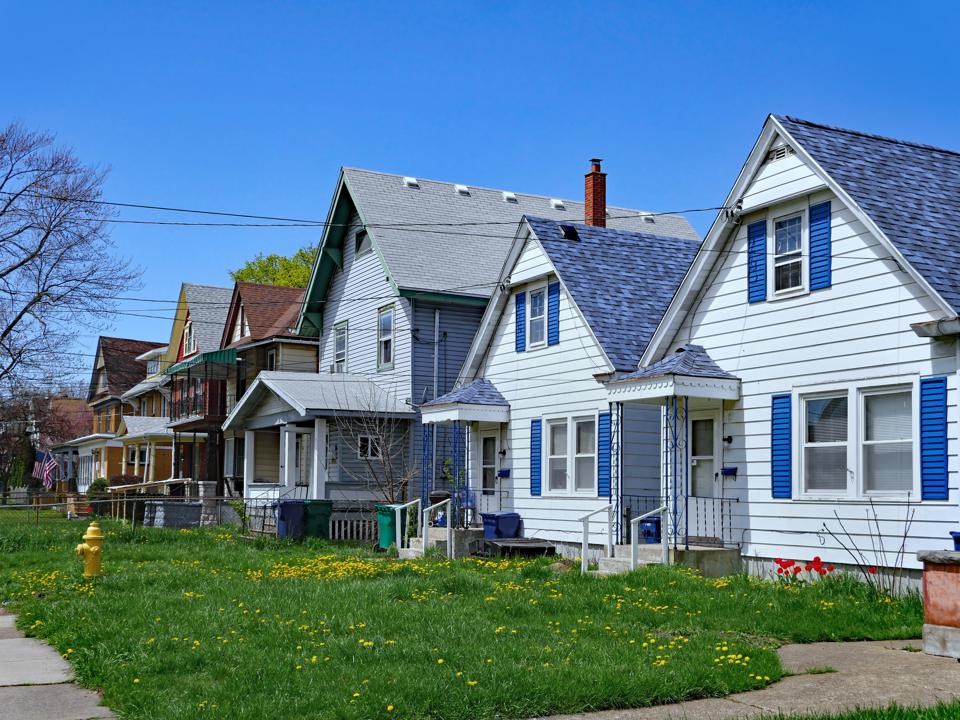

# IMPORT LIBRARIES

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LinearRegression 
lr = LinearRegression()
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score 

from sklearn.linear_model import Ridge, Lasso
R = Ridge()
L= Lasso()
from sklearn.linear_model import ElasticNet
E = ElasticNet(l1_ratio=.9)
from sklearn.tree import ExtraTreeRegressor
ETR = ExtraTreeRegressor()
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor()
from sklearn.neighbors import KNeighborsRegressor
est = KNeighborsRegressor()
from datetime import datetime

# DEF ALGORITHM FOR REGRESSION

In [64]:
def regression(x,y):
        from sklearn.linear_model import LinearRegression
        from sklearn.linear_model import Ridge,Lasso
        from sklearn.linear_model import ElasticNet
        from sklearn.neighbors import KNeighborsRegressor
        from sklearn.ensemble import GradientBoostingRegressor
        from sklearn.tree import ExtraTreeRegressor
        from sklearn.tree import DecisionTreeRegressor
        from xgboost import XGBRegressor
        from sklearn.model_selection import train_test_split
        from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
        
        L=LinearRegression()
        R=Ridge()
        Lass=Lasso()
        E=ElasticNet()
        ETR=ExtraTreeRegressor()
        GBR=GradientBoostingRegressor()
        kn=KNeighborsRegressor()
        dt=DecisionTreeRegressor()
        xgb=XGBRegressor()
       
        
        algos=[L,R,Lass,E,ETR,GBR,kn,dt,xgb]
        algo_names=['Linear','Ridge','Lasso','ElasticNet','Extra Tree','Gradient Boosting','KNeighborsRegressor','Decision Tree','XGBRegressor']
        
        x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.2,random_state=42)
        
        r_squared= []
        rmse= []
        mae= []
        
        result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)
        
        
        for algo in algos:
            p=algo.fit(x_train,y_train).predict(x_test)
            r_squared.append(r2_score(y_test,p))
            rmse.append(mean_squared_error(y_test,p)**.5)
            mae.append(mean_absolute_error(y_test,p))

        result.R_Squared=r_squared
        result.RMSE=rmse
        result.MAE=mae
        
        rtable=result.sort_values('R_Squared',ascending=False)
        return rtable

In [2]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 5074-7CFC

 Directory of C:\Users\Ahmet\Desktop\AI General\Projects\Kaggle projects\6-USA-House Price Prediction

23.08.2022  12:13    <DIR>          .
23.08.2022  12:13    <DIR>          ..
23.08.2022  11:50    <DIR>          .ipynb_checkpoints
23.08.2022  12:10           145.884 960x0.jpg
23.08.2022  10:51           526.795 data.csv
23.08.2022  10:53           526.795 output.csv
23.08.2022  12:13           498.604 USA HOUSE PRICE PREDICTION.ipynb
               4 File(s)      1.698.078 bytes
               3 Dir(s)  63.807.582.208 bytes free


# LOAD DATA

In [3]:
df = pd.read_csv('data.csv')

# EXPLORATORY DATA ANALYSIS

In [4]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [5]:
df.tail()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4595,2014-07-09 00:00:00,308166.666667,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,534333.333333,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,416904.166667,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,203400.000000,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA
4599,2014-07-10 00:00:00,220600.000000,3.0,2.50,1490,8102,2.0,0,0,4,1490,0,1990,0,18717 SE 258th St,Covington,WA 98042,USA


In [6]:
df.sample(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
2338,2014-06-11 00:00:00,742000.0,4.0,2.50,2810,10986,2.0,0,0,3,2810,0,1997,0,1755 268th Pl SE,Sammamish,WA 98075,USA
3323,2014-06-25 00:00:00,645000.0,3.0,2.75,1850,16960,1.0,0,2,4,1850,0,1953,1983,633 NW 116th St,Seattle,WA 98177,USA
3659,2014-06-30 00:00:00,359500.0,4.0,2.75,2140,10316,2.0,0,0,3,2140,0,1993,0,27721 48th Ave S,Auburn,WA 98001,USA
3817,2014-07-02 00:00:00,659000.0,4.0,2.00,2090,10800,1.0,0,0,4,2090,0,1951,1999,3738 86th Ave SE,Mercer Island,WA 98040,USA
2104,2014-06-09 00:00:00,250000.0,5.0,1.50,2520,5753,1.5,0,0,4,1510,1010,1928,0,2134 Montgomery Ave,Enumclaw,WA 98022,USA


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [8]:
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [9]:
df.shape

(4600, 18)

In [10]:
abs(df.corr()['price']).sort_values(ascending=False)

price            1.000000
sqft_living      0.430410
sqft_above       0.367570
bathrooms        0.327110
view             0.228504
sqft_basement    0.210427
bedrooms         0.200336
floors           0.151461
waterfront       0.135648
sqft_lot         0.050451
condition        0.034915
yr_renovated     0.028774
yr_built         0.021857
Name: price, dtype: float64

# DATA VISUALIZATIONS

<AxesSubplot:xlabel='yr_built', ylabel='price'>

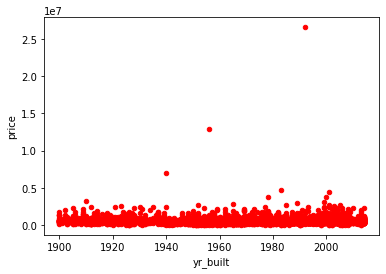

In [11]:
df.plot(kind = 'scatter',
        x = 'yr_built',
        y = 'price',
        color = 'red')
  
# set the title

In [12]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


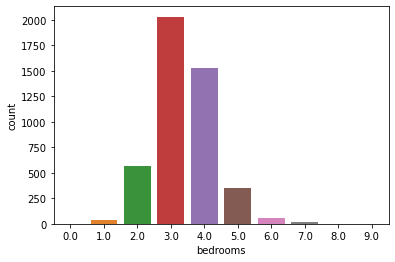

In [13]:
sns.countplot(df['bedrooms']);

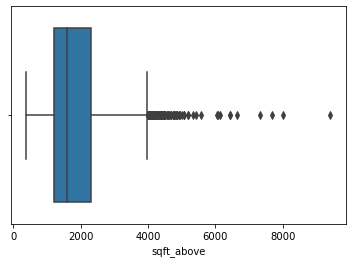

In [14]:
sns.boxplot(df['sqft_above']);

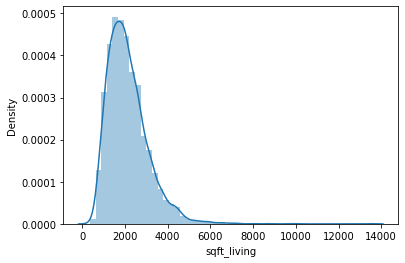

In [15]:
sns.distplot(df['sqft_living']);

<AxesSubplot:xlabel='bathrooms', ylabel='count'>

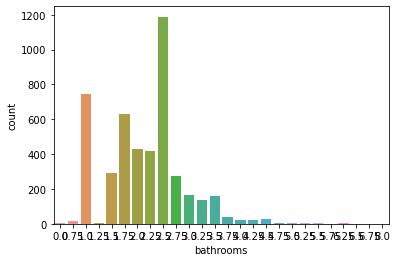

In [16]:
sns.countplot(df['bathrooms'])

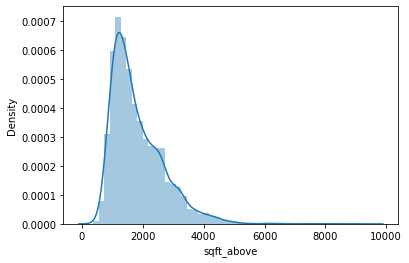

In [17]:
sns.distplot(df['sqft_above']);

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

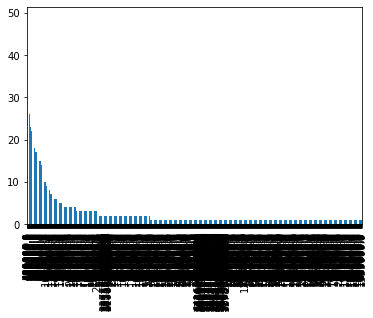

In [18]:
df['price'].value_counts().plot(kind='bar')
sns.despine

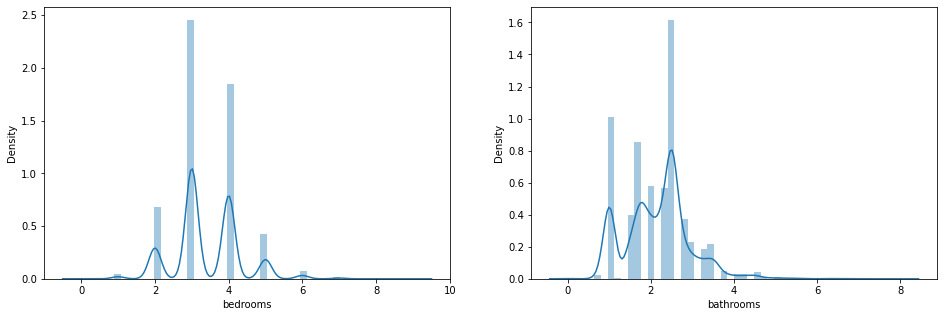

In [19]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['bedrooms'])
plt.subplot(1,2,2)
sns.distplot(df['bathrooms'])
plt.show()

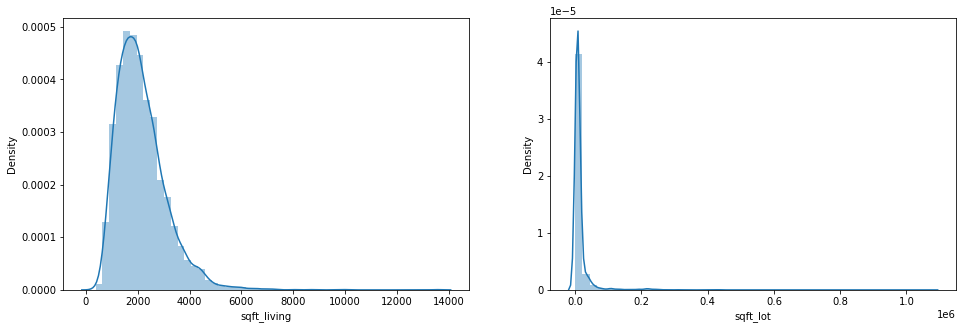

In [20]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['sqft_living'])
plt.subplot(1,2,2)
sns.distplot(df['sqft_lot'])
plt.show()

# FEATURE ENGINEERING

In [21]:
df['date'] = pd.to_datetime(df['date'])

In [22]:
df['Day'] = df['date'].dt.strftime('%d')

In [23]:
df['month'] = df['date'].dt.strftime('%m')


In [24]:
df['year'] = df['date'].dt.strftime('%Y')


In [25]:
df.drop(['date'],axis=1,inplace=True)


In [26]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,Day,month,year
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,02,05,2014
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA,02,05,2014
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,02,05,2014
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA,02,05,2014
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA,02,05,2014


In [27]:
df['country'].value_counts()

USA    4600
Name: country, dtype: int64

In [28]:
df['statezip'].unique()

array(['WA 98133', 'WA 98119', 'WA 98042', 'WA 98008', 'WA 98052',
       'WA 98115', 'WA 98038', 'WA 98045', 'WA 98155', 'WA 98105',
       'WA 98074', 'WA 98106', 'WA 98007', 'WA 98092', 'WA 98198',
       'WA 98006', 'WA 98102', 'WA 98011', 'WA 98125', 'WA 98003',
       'WA 98136', 'WA 98033', 'WA 98029', 'WA 98117', 'WA 98034',
       'WA 98072', 'WA 98023', 'WA 98107', 'WA 98166', 'WA 98116',
       'WA 98024', 'WA 98055', 'WA 98077', 'WA 98027', 'WA 98059',
       'WA 98075', 'WA 98014', 'WA 98065', 'WA 98199', 'WA 98053',
       'WA 98058', 'WA 98122', 'WA 98103', 'WA 98112', 'WA 98005',
       'WA 98118', 'WA 98177', 'WA 98004', 'WA 98019', 'WA 98144',
       'WA 98168', 'WA 98001', 'WA 98056', 'WA 98146', 'WA 98028',
       'WA 98148', 'WA 98057', 'WA 98040', 'WA 98010', 'WA 98051',
       'WA 98031', 'WA 98109', 'WA 98030', 'WA 98126', 'WA 98032',
       'WA 98178', 'WA 98288', 'WA 98108', 'WA 98070', 'WA 98188',
       'WA 98002', 'WA 98039', 'WA 98022', 'WA 98068', 'WA 980

In [29]:
df[['code','Statezip']] = df.statezip.str.split(" ", expand=True) 
df.drop(['statezip'],axis=1,inplace=True)

In [30]:
df.drop(['code','street'],axis=1,inplace=True)

In [31]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,country,Day,month,year,Statezip
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,Shoreline,USA,02,05,2014,98133
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,Seattle,USA,02,05,2014,98119
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,Kent,USA,02,05,2014,98042
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,Bellevue,USA,02,05,2014,98008
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,Redmond,USA,02,05,2014,98052


In [32]:
df['city'].unique()

array(['Shoreline', 'Seattle', 'Kent', 'Bellevue', 'Redmond',
       'Maple Valley', 'North Bend', 'Lake Forest Park', 'Sammamish',
       'Auburn', 'Des Moines', 'Bothell', 'Federal Way', 'Kirkland',
       'Issaquah', 'Woodinville', 'Normandy Park', 'Fall City', 'Renton',
       'Carnation', 'Snoqualmie', 'Duvall', 'Burien', 'Covington',
       'Inglewood-Finn Hill', 'Kenmore', 'Newcastle', 'Mercer Island',
       'Black Diamond', 'Ravensdale', 'Clyde Hill', 'Algona', 'Skykomish',
       'Tukwila', 'Vashon', 'Yarrow Point', 'SeaTac', 'Medina',
       'Enumclaw', 'Snoqualmie Pass', 'Pacific', 'Beaux Arts Village',
       'Preston', 'Milton'], dtype=object)

In [33]:
df['city']=df['city'].map({'Shoreline':0,'Seattle':1,'Kent':2,'Bellevue':3,'Redmond':4,'Maple Valley':5,'North Bend':6,'Lake Forest Park':7,
                          'Sammamish':8,'Auburn':9,'Des Moines':10,'Bothell':11,'Federal Way':2,'Kirkland':13,'Issaquah':14,'Woodinville':15,
                          'Normandy Park':16,'Fall City':17,'Renton':18,'Carnation':19,'Snoqualmie':20,'Duvall':21,'Burien':22,'Covington':23,
                          'Inglewood-Finn Hill':24,'Kenmore':25,'Newcastle':26,'Mercer Island':27,'Black Diamond':28,'Ravensdale':29,'Clyde Hill':30,'Algona':31,
                          'Skykomish':32,'Tukwila':33,'Vashon':34,'Yarrow Point':35,'SeaTac':36,'Medina':37,'Enumclaw':38,'Snoqualmie Pass':39,
                          'Pacific':40,'Beaux Arts Village':41,'Preston':42,'Milton':43},)

In [34]:
df.drop(['country'],axis=1,inplace=True)

In [35]:
df.quantile(.97).astype('int')

price            1387806
bedrooms               5
bathrooms              3
sqft_living         4290
sqft_lot           64034
floors                 2
waterfront             0
view                   3
condition              5
sqft_above          3830
sqft_basement       1370
yr_built            2012
yr_renovated        2012
city                  33
Name: 0.97, dtype: int32

In [36]:
df['Statezip']=df['Statezip'].astype('category')

In [37]:
outliers=df.quantile(.97)
df=df[(df['price']<outliers['price'])]
df=df[(df['bedrooms']<outliers['bedrooms'])]
df=df[(df['sqft_living']<outliers['sqft_living'])]
df=df[(df['sqft_lot']<outliers['sqft_lot'])]
df=df[(df['floors']<outliers['floors'])]
df=df[(df['sqft_above']<outliers['sqft_above'])]
df=df[(df['sqft_basement']<outliers['sqft_basement'])]


In [38]:
df['age']=2022-df['yr_built']

In [39]:
df['tadilat']=np.where(df['yr_renovated']>0, 1, 0)
df['basement']=np.where(df['sqft_basement']>0, 1, 0)

In [40]:
df['bedrooms']=df['bedrooms']**2
df['bathrooms']=df['bathrooms']**2
df['sqft_living']=df['sqft_living']**2
df['sqft_above']=df['sqft_above']**2

In [41]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,...,yr_built,yr_renovated,city,Day,month,year,Statezip,age,tadilat,basement
0,313000.000000,9.0,2.2500,1795600,7912,1.5,0,0,3,1795600,...,1955,2005,0,02,05,2014,98133,67,1,0
2,342000.000000,9.0,4.0000,3724900,11947,1.0,0,0,4,3724900,...,1966,0,2,02,05,2014,98042,56,0,0
3,420000.000000,9.0,5.0625,4000000,8030,1.0,0,0,4,1000000,...,1963,0,3,02,05,2014,98008,59,0,1
4,550000.000000,16.0,6.2500,3763600,10500,1.0,0,0,4,1299600,...,1976,1992,4,02,05,2014,98052,46,1,1
5,490000.000000,4.0,1.0000,774400,6380,1.0,0,0,3,774400,...,1938,1994,1,02,05,2014,98115,84,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,308166.666667,9.0,3.0625,2280100,6360,1.0,0,0,4,2280100,...,1954,1979,1,09,07,2014,98133,68,1,0
4596,534333.333333,9.0,6.2500,2131600,7573,2.0,0,0,3,2131600,...,1983,2009,3,09,07,2014,98007,39,1,0
4597,416904.166667,9.0,6.2500,9060100,7014,2.0,0,0,3,9060100,...,2009,0,18,09,07,2014,98059,13,0,0
4598,203400.000000,16.0,4.0000,4368100,6630,1.0,0,0,3,1144900,...,1974,0,1,10,07,2014,98178,48,0,1


# REGRESSION

In [42]:
x,y=df[['bedrooms','bathrooms','sqft_living','sqft_above','floors','tadilat','view','condition','Statezip','city','waterfront','age']],df[['price']]

In [43]:
x=pd.get_dummies(x,drop_first=True)

In [44]:
x.head()

,bedrooms,bathrooms,sqft_living,sqft_above,floors,tadilat,view,condition,city,waterfront,...,Statezip_98155,Statezip_98166,Statezip_98168,Statezip_98177,Statezip_98178,Statezip_98188,Statezip_98198,Statezip_98199,Statezip_98288,Statezip_98354
0,9.0,2.2500,1795600,1795600,1.5,1,0,3,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9.0,4.0000,3724900,3724900,1.0,0,0,4,2,0,...,0,0,0,0,0,0,0,0,0,0
3,9.0,5.0625,4000000,1000000,1.0,0,0,4,3,0,...,0,0,0,0,0,0,0,0,0,0
4,16.0,6.2500,3763600,1299600,1.0,1,0,4,4,0,...,0,0,0,0,0,0,0,0,0,0
5,4.0,1.0000,774400,774400,1.0,1,0,3,1,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
y.head()

,price
0,313000.0
2,342000.0
3,420000.0
4,550000.0
5,490000.0


In [46]:
df.shape

(3702, 21)

In [47]:
x_train, x_test,y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=13)

In [48]:
x_train.shape, x_test.shape,y_train.shape, y_test.shape 

((2961, 87), (741, 87), (2961, 1), (741, 1))

In [49]:
regmodel = lr.fit(x_train,y_train)

In [50]:
y_pretest = regmodel.predict(x_test)
y_pretest

array([[ 275517.2132178 ],
       [ 898153.81516708],
       [ 181013.62394043],
       [ 262131.20345711],
       [ 225204.36267579],
       [ 525536.2367608 ],
       [ 486341.18585494],
       [ 848609.52899731],
       [ 217574.83409289],
       [ 871704.98181634],
       [ 320386.26928182],
       [ 595369.13336777],
       [ 327837.6728529 ],
       [ 439785.03465327],
       [ 646992.09554209],
       [ 435104.09405294],
       [ 166651.96694735],
       [ 458234.80761547],
       [ 290639.17288671],
       [ 786198.58689362],
       [ 595306.67822728],
       [ 474568.66241532],
       [ 457520.47091021],
       [ 284447.95892247],
       [ 590487.56080855],
       [ 206154.34751006],
       [ 234559.51938035],
       [ 445202.71889628],
       [ 589135.70058673],
       [ 192437.98992679],
       [ 275041.38282309],
       [ 762412.50879873],
       [ 258496.25477888],
       [ 331852.80492137],
       [ 484848.82885187],
       [ 450703.90578359],
       [ 442624.17373299],
 

In [51]:
(mean_squared_error(y_test, y_pretest)) ** 0.5

106734.36175207903

In [52]:
r2_score(y_test, y_pretest)

0.7815269786309725

# DEEP LEARNING

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score , mean_squared_error, mean_absolute_error

In [54]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.20 , random_state = 42)

In [55]:
#creating a neural network model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [56]:
model = Sequential()
model.add(Dense(81,activation = "relu"))
model.add(Dense(40,activation = "relu"))
model.add(Dense(27,activation = "relu"))
model.add(Dense(19,activation = "relu"))
model.add(Dense(5,activation = "relu"))
model.add(Dense(3,activation = "relu"))
model.add(Dense(1))
model.compile(optimizer = "Adam", loss = "mse")

In [57]:
model.fit(x=x_train,y=y_train,validation_data=(x_train,y_train),batch_size=128,epochs=100,verbose=1)#epochs gidip gelme sayısıdır artırdıkça başarımız artacake

Epoch 1/100
24/24 [==============================] - 1s 9ms/step - loss: 477163749376.0000 - val_loss: 294381846528.0000
Epoch 2/100
24/24 [==============================] - 0s 3ms/step - loss: 278502113280.0000 - val_loss: 276218413056.0000
Epoch 3/100
24/24 [==============================] - 0s 3ms/step - loss: 276218380288.0000 - val_loss: 276218380288.0000
Epoch 4/100
24/24 [==============================] - 0s 3ms/step - loss: 276218413056.0000 - val_loss: 276218347520.0000
Epoch 5/100
24/24 [==============================] - 0s 3ms/step - loss: 276218314752.0000 - val_loss: 276218347520.0000
Epoch 6/100
24/24 [==============================] - 0s 3ms/step - loss: 276218347520.0000 - val_loss: 276218347520.0000
Epoch 7/100
24/24 [==============================] - 0s 3ms/step - loss: 276218281984.0000 - val_loss: 276218347520.0000
Epoch 8/100
24/24 [==============================] - 0s 3ms/step - loss: 276218249216.0000 - val_loss: 276218281984.0000
Epoch 9/100
24/24 [=============

24/24 [==============================] - 0s 4ms/step - loss: 276216905728.0000 - val_loss: 276216872960.0000
Epoch 69/100
24/24 [==============================] - 0s 3ms/step - loss: 276216872960.0000 - val_loss: 276216840192.0000
Epoch 70/100
24/24 [==============================] - 0s 3ms/step - loss: 276216938496.0000 - val_loss: 276216840192.0000
Epoch 71/100
24/24 [==============================] - 0s 3ms/step - loss: 276216872960.0000 - val_loss: 276216807424.0000
Epoch 72/100
24/24 [==============================] - 0s 4ms/step - loss: 276216840192.0000 - val_loss: 276216807424.0000
Epoch 73/100
24/24 [==============================] - 0s 3ms/step - loss: 276216807424.0000 - val_loss: 276216807424.0000
Epoch 74/100
24/24 [==============================] - 0s 3ms/step - loss: 276216774656.0000 - val_loss: 276216774656.0000
Epoch 75/100
24/24 [==============================] - 0s 3ms/step - loss: 276216807424.0000 - val_loss: 276216741888.0000
Epoch 76/100
24/24 [=================

In [58]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 81)                7128      
                                                                 
 dense_1 (Dense)             (None, 40)                3280      
                                                                 
 dense_2 (Dense)             (None, 27)                1107      
                                                                 
 dense_3 (Dense)             (None, 19)                532       
                                                                 
 dense_4 (Dense)             (None, 5)                 100       
                                                                 
 dense_5 (Dense)             (None, 3)                 18        
                                                                 
 dense_6 (Dense)             (None, 1)                 4

<AxesSubplot:>

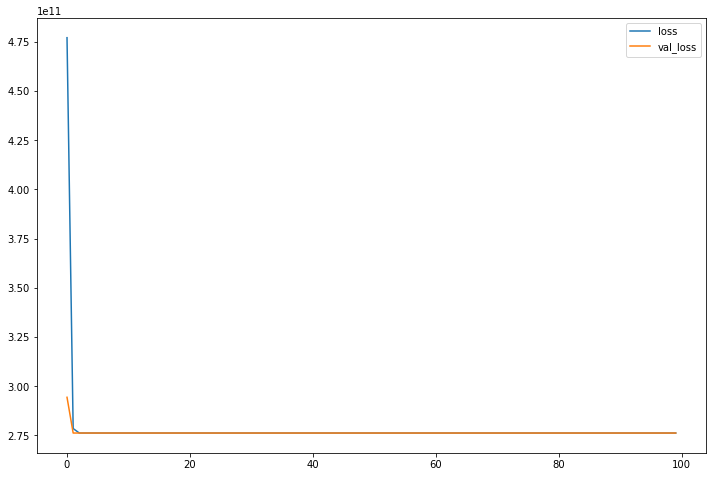

In [59]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot(figsize=(12,8))

In [60]:
pred=model.predict(x_train)

93/93 [==============================] - 0s 936us/step


In [61]:
(mean_squared_error(y_train,pred))**.5

525562.7375602813

In [62]:
r2_score(y_train,pred)

-4.400089759813146

# REGRESSION ALGORITHM

In [65]:
regression(x,y)

,R_Squared,RMSE,MAE
Lasso,0.768878,107392.411174,72546.724977
Linear,0.768861,107396.333546,72548.796884
Ridge,0.766026,108053.044660,73165.874065
XGBRegressor,0.728727,116347.354076,75131.495980
Gradient Boosting,0.697457,122870.124700,87733.143097
ElasticNet,0.480982,160932.609903,120602.282725
Extra Tree,0.412697,171192.191459,109432.549088
Decision Tree,0.409480,171660.496501,110999.721310
KNeighborsRegressor,0.295815,187454.724518,142805.679864


In [ ]:
from pycaret.regression import *
exp_name=setup(data=df_r,target='Price')

In [ ]:
best_model=compare_models()